In [1]:
#!pip install --upgrade tensorflow==1.15

     |████████████████████████████████| 412.3 MB 19 kB/s 
     |████████████████████████████████| 503 kB 62.9 MB/s 
     |████████████████████████████████| 3.8 MB 17.8 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d3a0eaedb1101dd77cd78fb042c55015a97c0e947283014ab365433b5d9ccd63
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [2]:
from sklearn.datasets import load_digits
df = load_digits()

In [3]:
#Import all the library needed
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [4]:
# SPIT DATASET
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 0.2, random_state=1)

x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
y_train, y_test = y_train.astype('float32'), y_test.astype('float32')
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

encoder = OneHotEncoder().fit(y_train)
y_train = encoder.transform(y_train).toarray()
y_test = encoder.transform(y_test).toarray()

In [5]:
#Variables
EPOCH = 1000
ALPHA = 0.1
n_features = x_train.shape[1]
n_classes = y_train.shape[1]

In [6]:
# Menentukan jumlah features dan class
input_tensor = tf.placeholder(tf.float32)
label_tensor = tf.placeholder(tf.float32)

In [7]:
# Mendefine jumlah hiddenlayer dan output (jumlah hidden 8 & 8 sedangkan outputnya 10)
neurons = [8, 8, n_classes]
n_layers = len(neurons)

In [8]:
parameters = {}
for i in range(n_layers):
  parameters[f'W{i+1}'] = tf.Variable(
      tf.random.normal([
          n_features if (i == 0) else neurons[i-1], neurons[i]
      ]),
      tf.float32
  )

  parameters[f'B{i+1}'] = tf.Variable(
      tf.random.normal(
          [1, neurons[i]]
      ),
      tf.float32
  )

In [9]:
#Feed Forward Function
def forward():
    a = input_tensor
    for i in range(n_layers):
      w = parameters[f'W{i+1}']
      b = parameters[f'B{i+1}']

      z = tf.matmul(a, w) + b
      if i == n_layers - 1:
        a = tf.nn.softmax(z)
      else:
        a = tf.nn.tanh(z)
    return a

In [10]:
#Mencari nilai predict dari hasil
y_predict = forward()

In [11]:
with tf.Session() as sess:
  logits_tensor = forward()
  loss_tensor = tf.reduce_mean(0.5 * (label_tensor - logits_tensor) ** 2)

  true_preds_tensor = tf.equal(
      tf.argmax(logits_tensor, axis=1), tf.argmax(label_tensor, axis=1))
  acc_tensor = tf.reduce_mean(tf.cast(true_preds_tensor, tf.float32))

  optimizer = tf.train.AdamOptimizer(ALPHA).minimize(loss_tensor)

  sess.run(tf.global_variables_initializer())

  for i in range(EPOCH):
    sess.run(optimizer, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    loss = sess.run(loss_tensor, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    acc = sess.run(acc_tensor, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    val_loss = sess.run(loss_tensor, feed_dict={
        input_tensor:x_test,
        label_tensor:y_test
    })
    val_acc = sess.run(acc_tensor, feed_dict={
        input_tensor:x_test,
        label_tensor:y_test
    })
    if i % 100 == 0:
      print(f'Epoch {i+1} - Loss {loss:.4f} - Accuracy {(acc*100):.2f} % - Val Loss {val_loss:.4f} - Val Accuracy {(val_acc * 100):.2f} %')
    y_pred=sess.run(y_predict, feed_dict={
            input_tensor: x_train,
            label_tensor: y_train
        })
    y_true = np.argmax(y_train,1)
    y_preds = np.argmax(y_pred,1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1 - Loss 0.0644 - Accuracy 13.57 % - Val Loss 0.0628 - Val Accuracy 13.89 %
Epoch 101 - Loss 0.0250 - Accuracy 56.85 % - Val Loss 0.0255 - Val Accuracy 52.78 %
Epoch 201 - Loss 0.0206 - Accuracy 64.65 % - Val Loss 0.0235 - Val Accuracy 61.39 %
Epoch 301 - Loss 0.0191 - Accuracy 66.39 % - Val Loss 0.0221 - Val Accuracy 63.33 %
Epoch 401 - Loss 0.0187 - Accuracy 66.67 % - Val Loss 0.0224 - Val Accuracy 62.22 %
Epoch 501 - Loss 0.0195 - Accuracy 65.76 % - Val Loss 0.0235 - Val Accuracy 59.72 %
Epoch 601 - Loss 0.0186 - Accuracy 66.95 % - Val Loss 0.0217 - Val Accuracy 63.61 %
Epoch 701 - Loss 0.0185 - Accuracy 67.15 % - Val Loss 0.0214 - Val Accuracy 63.61 %
Epoch 801 - Loss 0.0181 - Accuracy 67.85 % - Val Loss 0.0221 - Val Accuracy 63.33 %
Epoch 901 - Loss 0.0195 - Accuracy 65.83 % - Val Loss 0.0226 - Val Accuracy 60.28 %


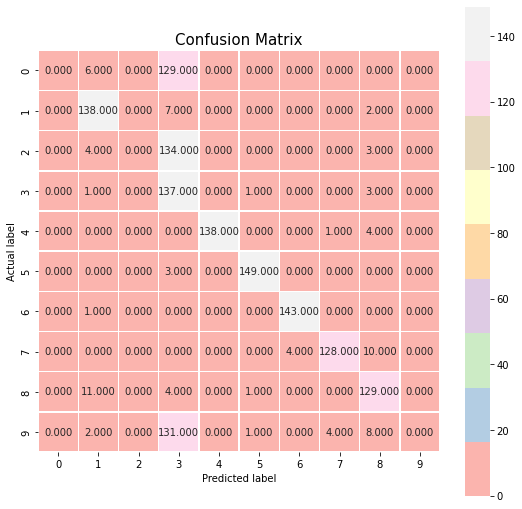

In [12]:
#Membuat confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_true, y_preds)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);

Dari hasil confusion matrix diatas dapat dilihat bahwa model paling sedikit salah memprediksi pada kelas 5 dimana pada kelas tersebut model berhasil memprediksi atau mengklasifikasi dengan benar sebanyak 139 kali dan salah mengklasifikasi hanya sebanyak 4 kali.